In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# !pip install seaborn

In [3]:
# Load the dataset (replace 'file_path' with the actual file path)
df = pd.read_csv('cleaned_dataset.csv')

In [4]:
# Extract KIBA scores
kiba_scores = df['kiba_score']
outlier_threshold = kiba_scores.quantile(0.99)

In [5]:
kiba_scores.value_counts()

kiba_score
2.250000e+04    19721
7.200000e+04    12803
1.210000e+04     9663
7.610000e+03     6017
1.150000e+00     5941
                ...  
4.440000e+05        1
5.110000e+05        1
4.000000e+06        1
3.280000e-03        1
1.140000e-03        1
Name: count, Length: 7719, dtype: int64

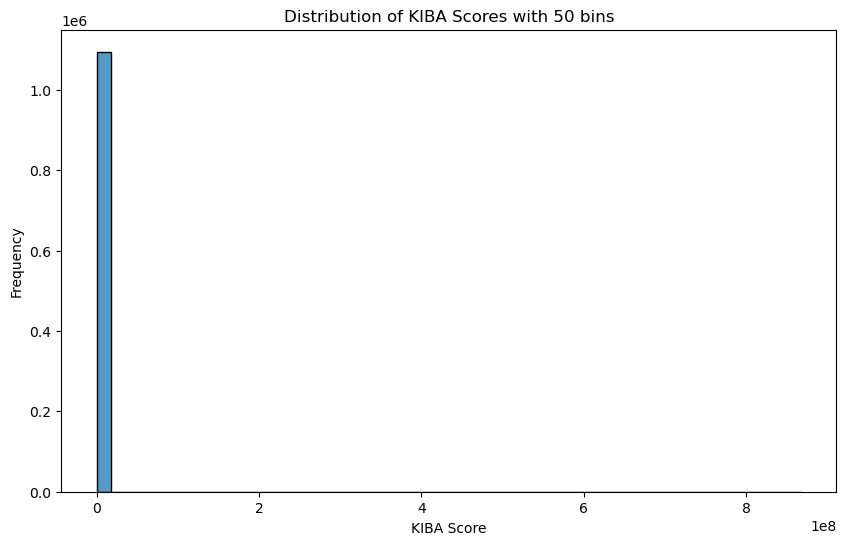

In [8]:
# Plot the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(kiba_scores, bins=50, kde=False)
plt.title('Distribution of KIBA Scores with 50 bins')
plt.xlabel('KIBA Score')
plt.ylabel('Frequency')
plt.show()

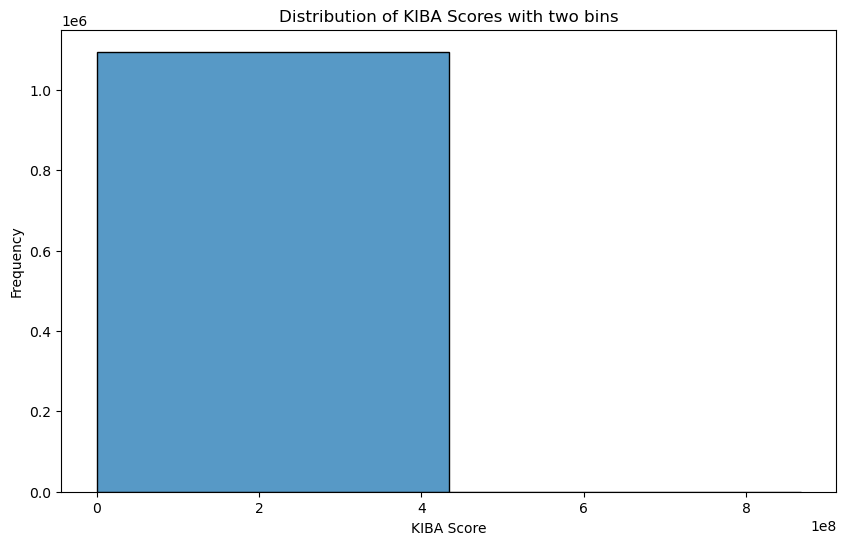

In [9]:
# Plot the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(kiba_scores, bins=2, kde=False)
plt.title('Distribution of KIBA Scores with two bins')
plt.xlabel('KIBA Score')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Apply logarithmic transformation
log_kiba_scores = kiba_scores.apply(lambda x: np.log(x + 1))

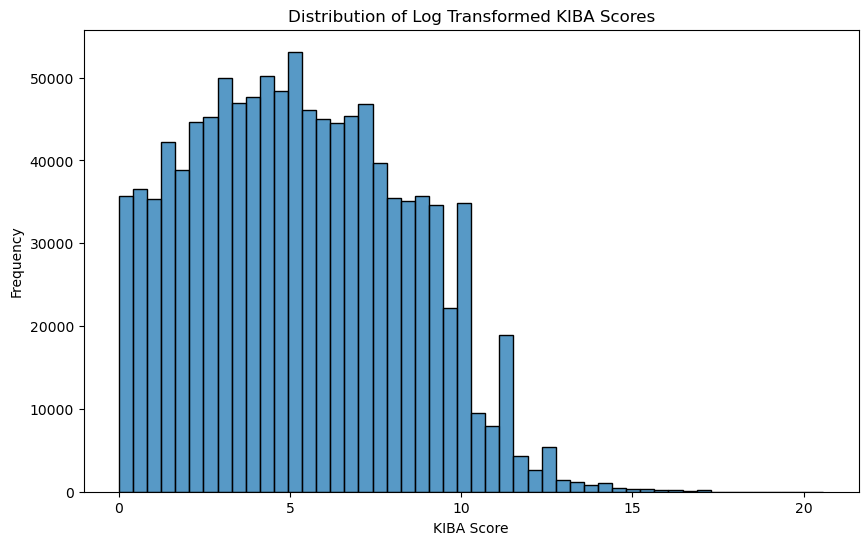

In [11]:
# Plot the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_kiba_scores, bins=50, kde=False)
plt.title('Distribution of Log Transformed KIBA Scores')
plt.xlabel('KIBA Score')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Check skewness
skewness = kiba_scores.skew()
print(f"Skewness of KIBA Scores before transformation: {skewness}")

Skewness of KIBA Scores before transformation: 509.8979648783205


In [15]:
# Check skewness
skewness = log_kiba_scores.skew()
print(f"Skewness of Log KIBA Scores: {skewness}")

Skewness of Log KIBA Scores: 0.26324153789413157


In [16]:
# Identify high-value outliers (e.g., scores greater than the 99th percentile)
outlier_threshold = kiba_scores.quantile(0.99)
high_value_outliers = df[df['kiba_score'] > outlier_threshold]
# Print the count
print(f"Number of high-value outlier rows: {len(high_value_outliers)}")

Number of high-value outlier rows: 7941


In [ ]:
# Attemp to see if where 'kiba_score_estimated' is False, it would be less skewed,, it wasn't
'''
# Remove rows where kiba_score_estimated is True among high-value outliers
df_cleaned = df[~((df['kiba_score'] > outlier_threshold) & (df['kiba_score_estimated'] == True))]
# Print the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"Number of rows removed: {rows_removed}")
df = df_cleaned
'''